In [1]:
# 1. Import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [10]:
# 2. Upload file CSV
from google.colab import files
uploaded = files.upload()

Saving Covid19.csv to Covid19.csv


In [11]:
# 3. Load dataset
df = pd.read_csv("Covid19.csv")
df.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,1/22/2020 12:00,Anhui,China,1/22/2020 12:00,1,0,0
1,2,1/22/2020 12:00,Beijing,China,1/22/2020 12:00,14,0,0
2,3,1/22/2020 12:00,Chongqing,China,1/22/2020 12:00,6,0,0
3,4,1/22/2020 12:00,Fujian,China,1/22/2020 12:00,1,0,0
4,5,1/22/2020 12:00,Gansu,China,1/22/2020 12:00,0,0,0


In [12]:
# Cek informasi kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24709 entries, 0 to 24708
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Sno             24709 non-null  int64 
 1   Date            24709 non-null  object
 2   Province/State  20627 non-null  object
 3   Country         24709 non-null  object
 4   Last Update     24709 non-null  object
 5   Confirmed       24709 non-null  int64 
 6   Deaths          24709 non-null  int64 
 7   Recovered       24709 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 1.5+ MB


In [13]:
# Cek nilai null
print(df.isnull().sum())

Sno                  0
Date                 0
Province/State    4082
Country              0
Last Update          0
Confirmed            0
Deaths               0
Recovered            0
dtype: int64


In [14]:
# Menghapus baris yang mengandung nilai kosong
df = df.dropna()

In [15]:
# Encoding semua kolom kategori
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [19]:
# Split data untuk training dan testing
X = df.drop('Confirmed', axis=1)
y = df['Confirmed']

# Split 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Melatih Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

In [21]:
# Evaluasi
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Akurasi: 0.2682985942801745

Confusion Matrix:
 [[943   0  17 ...   0   0   0]
 [189   6  83 ...   0   0   0]
 [ 89   8  45 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   1]
 [  0   0   0 ...   0   0   1]
 [  0   0   0 ...   0   0   3]]

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.52      0.57      1813
           1       0.15      0.01      0.02       555
           2       0.23      0.16      0.19       281
           3       0.00      0.00      0.00       162
           4       0.10      0.06      0.08       110
           5       0.00      0.00      0.00        76
           6       0.00      0.00      0.00        52
           7       0.00      0.00      0.00        41
           8       0.00      0.00      0.00        39
           9       0.00      0.00      0.00        39
          10       0.00      0.00      0.00        44
          11       0.00      0.00      0.00        23
          12       0.00      0.0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

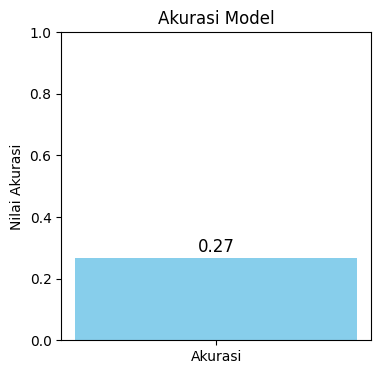

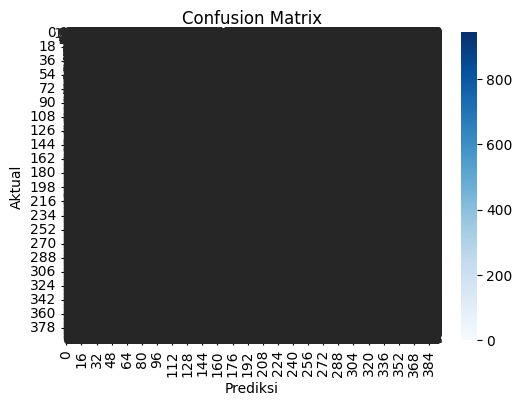

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

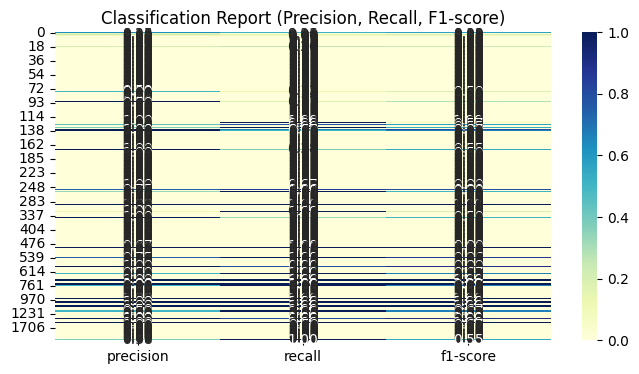

In [22]:
# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate accuracy
acc = accuracy_score(y_test, y_pred)  # Calculate accuracy and assign to 'acc'

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred) # Calculate confusion matrix and assign to 'cm'


## a. Akurasi Bar Chart
plt.figure(figsize=(4,4))
plt.bar(['Akurasi'], [acc], color='skyblue')
plt.ylim(0,1)
plt.title("Akurasi Model")
plt.ylabel("Nilai Akurasi")
plt.text(0, acc + 0.02, f"{acc:.2f}", ha='center', fontsize=12)
plt.show()

## b. Confusion Matrix Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

## c. Classification Report Heatmap
report_dict = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report_dict).transpose()
df_visual = df_report.iloc[:-3, :][['precision', 'recall', 'f1-score']]

plt.figure(figsize=(8,4))
sns.heatmap(df_visual, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title("Classification Report (Precision, Recall, F1-score)")
plt.show()